# Kernel Composition vs Intensity Surface distributon

In [6]:
import numpy as np
import tensorflow as tf
float_type = tf.dtypes.float64

from point.low_rank_rff import LowRankRFF
from point.low_rank_nystrom import LowRankNystrom
from point.point_process import CoxLowRankSpatialModel
from point.misc import Space

import gpflow.kernels as gfk

rng = np.random.RandomState()

## Gaussian Kernel

$k(\mathbf{x},\mathbf{y}) = \sigma^2 \exp \left(\frac{-(x_1 - y_1)^2}{2 l_1}\right)\exp \left(\frac{-(x_2 - y_2)^2}{2 l_2} \right)$

In [32]:
space = Space(-1,1)
variance = tf.Variable(8, dtype=float_type, name='sig')
length_scale = tf.Variable([0.5,0.5], dtype=float_type, name='l')

In [33]:
ard_kernel = gfk.SquaredExponential(variance= variance, lengthscales= length_scale)

lrgp = LowRankNystrom(ard_kernel, n_components =  250, random_state= rng, mode = 'grid').fit()
ard_process = CoxLowRankSpatialModel(lrgp, random_state = rng)

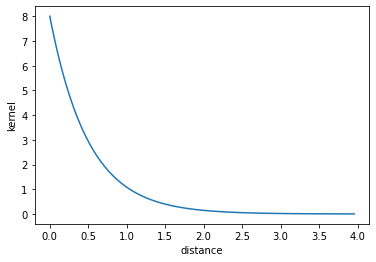

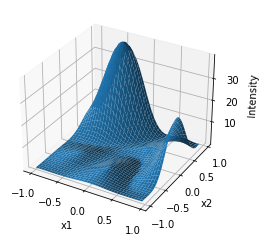

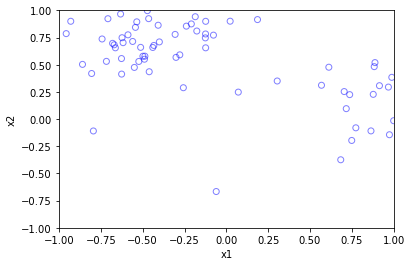

In [34]:
data = ard_process.generate(verbose = False, n_warm_up = 10000, n_iter = 0, space = space) 
ard_process.lrgp.plot_kernel()
ard_process.lrgp.plot_surface()
data.plot_points()

## Gaussian Kernel + Polynomial

$k(\mathbf{x}, \mathbf{x}) = (\sigma^2 \langle \mathbf{x}, \mathbf{y} \rangle + \text{offset})^{d}$

In [35]:
space = Space(-1,1)
variance2 = tf.Variable(8, dtype=float_type, name='sig')
variance22 = tf.Variable(4, dtype=float_type, name='sig')
length_scale2 = tf.Variable([0.5,0.5], dtype=float_type, name='l')

In [36]:
poly = gfk.Polynomial(degree=2.0, variance= variance22, offset= 0.1)
ard = gfk.SquaredExponential(variance= variance2, lengthscales= length_scale2) 
comp_kernel = ard + poly

lrgp = LowRankNystrom(comp_kernel, n_components =  250, random_state= rng, mode = 'grid').fit()
comp_process = CoxLowRankSpatialModel(lrgp, random_state = rng)

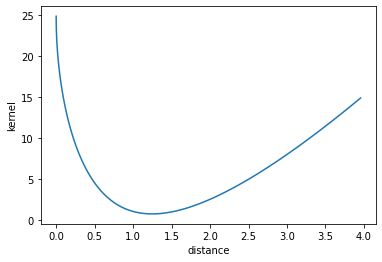

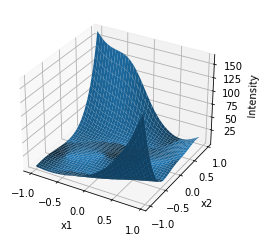

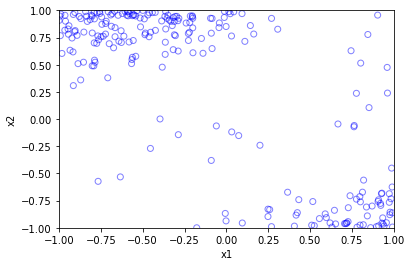

In [38]:
data = comp_process.generate(verbose = False, n_warm_up = 10000, n_iter = 0, space = space) 
comp_process.lrgp.plot_kernel()
comp_process.lrgp.plot_surface()
data.plot_points()

## Gaussian Kernel + Periodic

$k(\mathbf{x},\mathbf{y}) = k(r) = \sigma^2 exp\left( \frac{- \sin(\pi r / p)^2}{2 l^2} \right)$

In [39]:
space = Space(-1,1)
variance3 = tf.Variable(8, dtype=float_type, name='sig')
length_scale3 = tf.Variable([0.5,0.5], dtype=float_type, name='l')
period = (1000, 2) #number of periods lenght parameter per dimension (must be set)

In [40]:
ard3 = gfk.SquaredExponential(variance= variance3, lengthscales= length_scale3) 
periodic_kernel = gfk.Periodic(ard3, period = period)

lrgp = LowRankNystrom(periodic_kernel , n_components =  250, random_state= rng, mode = 'grid').fit()
comp_process = CoxLowRankSpatialModel(lrgp, random_state = rng)

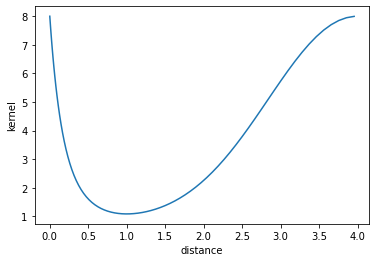

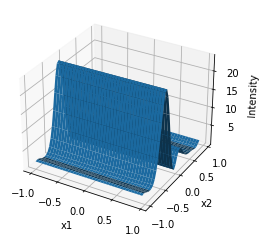

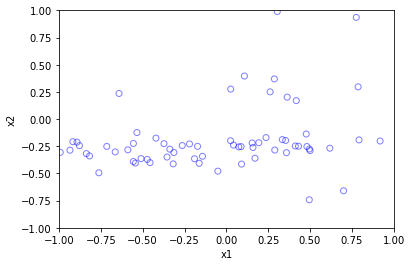

In [41]:
data = comp_process.generate(verbose = False, n_warm_up = 10000, n_iter = 0, space = space) 
comp_process.lrgp.plot_kernel()
comp_process.lrgp.plot_surface()
data.plot_points()